In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

1) Modify our "Mark and recapture" model to make it produce the average expectation for the number of animals. Do it by wrapping it in an outer loop, to run the model several times; remember the output (the estimation history) from each run of the model, average all estimation-histories across the runs. As you troubleshoot this, make the nsteps small, and auto-run the model only 2-3 times, just to make sure that it works. Once you are sure that your program works, you can again change the nsteps to several hundreds, and also make it rerun the model enough times to get a smooth-ish curve.

<IPython.core.display.Javascript object>


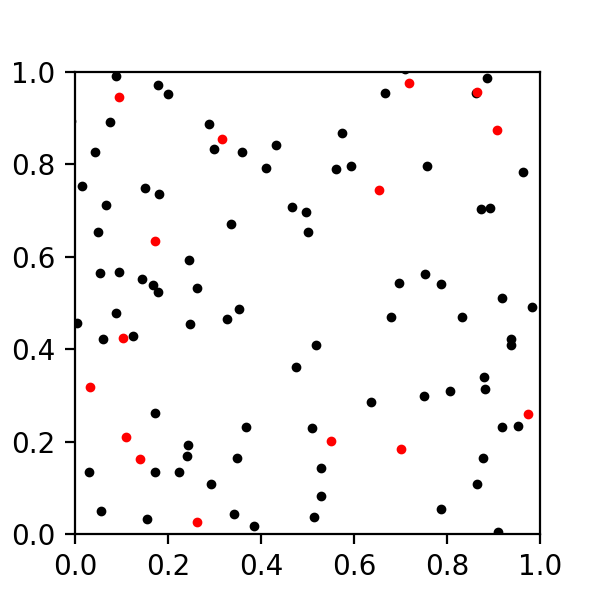

<IPython.core.display.Javascript object>


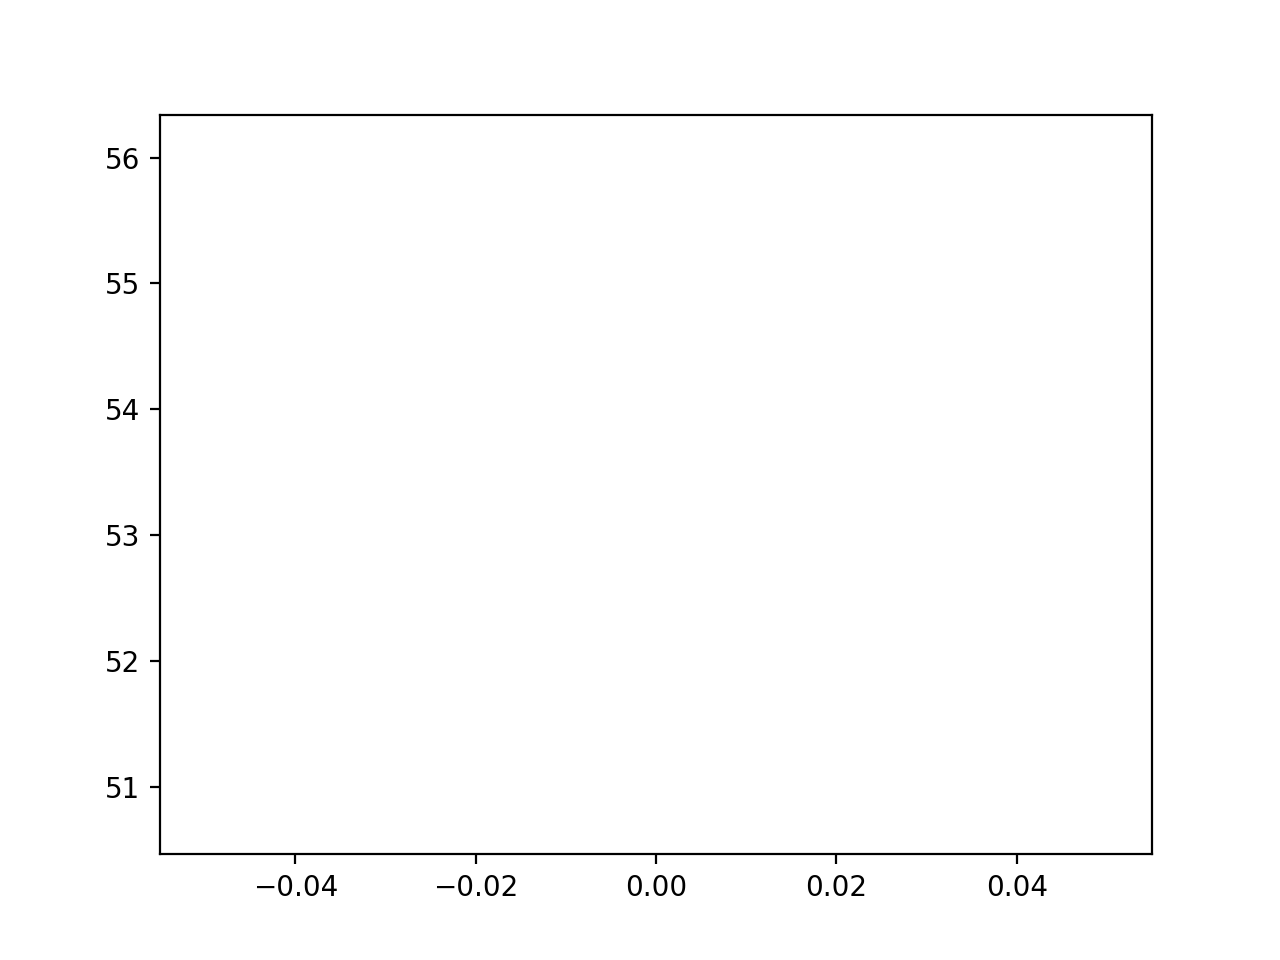

In [17]:
#MARK AND RECAPTURE AVERAGE ESTIMATIONS
%matplotlib notebook

n_animals = 100
n_steps = 10
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
ntrials = 10

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time we'll remember the estimation for N an ecologist could have made
estimation_history = np.zeros(ntrials)

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in range(ntrials):
     for itrial in range(ntrials):
        starting_point = np.random.uniform(low=0, high=2)
        for t in range(n_steps):
            x += vx #Moving elks around
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
            n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
            estimation_history=estimation[t]


            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
        
plt.figure()
plt.plot(np.mean(estimation_history));
#plt.plot(np.mean(estimation_history, axis=1), label=np.round(i,decimals=2)); I thought this code would work, but it was giving me and error saying the tuple was out of range

    



In this exercise building off the code we did with butterfly effect, I tried to create one graph just plotting the averages of every run. Unfortunately, this for some reason did not seem to plot and I messed around with the placement of the lines quite a bit. Ideally, I would have liked for this second graph to plot the averages of each run through ntrials, but couldn't quite figure out how to make this code work. I am unsure why my plot line isn't working. 

2) Once you can make nice curves of expected estimations, use this tool to answer the following question: is it better to place your trap on the border of your area, or in the center? You can probably guess the answer, but please also use the model to analyze it properly. (Hint: generate two average curves, one for corner-placement, one for center-placement, find a way to plot them on one graph, compare the curves.)

* After you built a nice plot, add a Markdown cell below, and add some write-up (about a good honest paragraph). Explain how to interpret the plot. Answer the question. What trap placement is better; why; and what is the logic of it all.

* As you can guess, this question is actually meaningful, as IRL it's obviously easier to put traps on the border of a lake, forest, desert etc. So it would be nice to know whether it makes a difference (whether it is worth is hiking to the middle of a swamp), and if yes, then what is this difference.

<IPython.core.display.Javascript object>


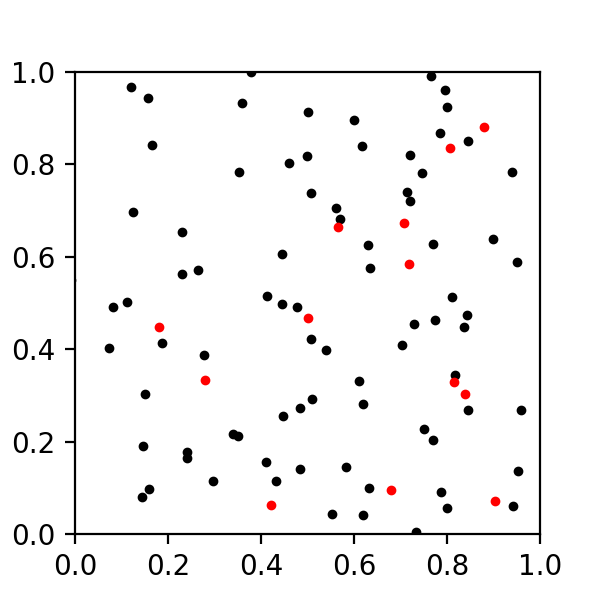

<IPython.core.display.Javascript object>


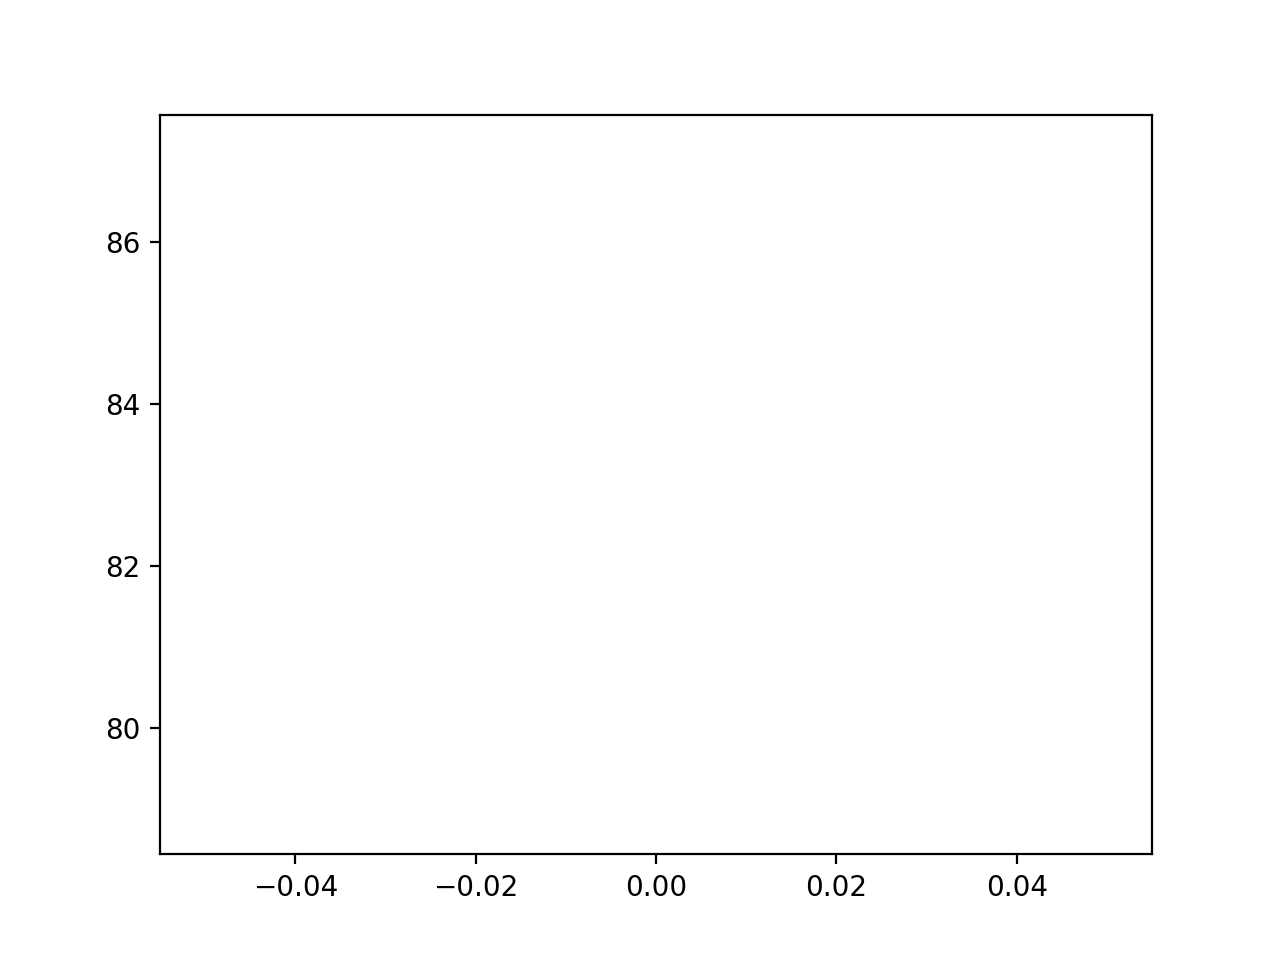

In [19]:
#MARK AND RECAPTURE DIFFERENT BORDER CONDITIONS 
%matplotlib notebook

n_animals = 100
n_steps = 10
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
ntrials = 10
trap_minimum = 0.2 #In an attempt to make the border in the center of the simulation
trap_maximum = 0.8

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)

# Capture
color = np.where(np.logical_and(x<trap_minimum , y<trap_maximum), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time we'll remember the estimation for N an ecologist could have made
history_estimation = np.zeros(ntrials)

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for i in range(ntrials):
     for itrial in range(ntrials):
        starting_point = np.random.uniform(low=0, high=2)
        for t in range(n_steps):
            x += vx #Moving elks around
            y += vy

            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)

            # Recapture
            n_recaptured_total = np.sum(np.logical_and(x<trap_minimum, y<trap_maximum))
            n_recaptured_marked = np.sum(np.logical_and(x<trap_minimum, y<trap_maximum)*color) # Condition1 AND cond2 AND color==1
            estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
            history_estimation=estimation[t]


            ax.clear()
            plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
            plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.canvas.draw() # <--------------- The main command to make it move
            #time.sleep(0.5)
        
plt.figure()
plt.plot(np.mean(estimation_history,#history_estimation)); #From outer edge borders, will having it here work? Probably not but to get them on the same graph?
plt.plot(np.mean(history_estimation)); #From center borders
#plt.plot(np.mean(estimation_history, axis=1), label=np.round(i,decimals=2)); I thought this code would work, but it was giving me and error saying the tuple was out of range


Here I tried to bring in trap minimum and trap maximum values to set the border in the center of the simulation, however I must have incorporated them incorrectly. Ideally, I would like to have one average graph with center borders and one average graph with outer edge borders on the same graph to compare, however for some reason I was not able ot debug this code and figure out why it was not running for me. I feel as though I know what I have to do but am having trouble figuring out and troubleshooting the code in order to make it work. 